In [3]:
from google.colab import files
uploaded = files.upload()

Saving au_fulldata_vic.csv to au_fulldata_vic.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
ts19 = pd.read_csv("au_fulldata_vic.csv")

In [6]:
ts19.head()

,Month,Day,TOTALDEMAND,YEAR,Date,relative_humidity,dew_temp,max_temp,min_temp,temp2m,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,avg_temp,ws_avg_50,ws_avg_10,Unnamed: 19
0,1,1,226550.31,2016,01-01-2016,56.49,12.69,27.74,15.97,21.87,1.63,1.09,6.98,5.98,4.48,3.60,21.855,4.305,3.535,NaN
1,1,2,199245.28,2016,02-01-2016,66.32,12.94,26.07,14.76,19.40,4.69,4.19,9.66,8.12,7.04,5.80,20.415,7.175,6.155,NaN
2,1,3,195312.89,2016,03-01-2016,71.23,13.13,22.40,15.35,18.41,5.58,3.55,7.79,6.27,6.92,5.35,18.875,6.685,4.910,NaN
3,1,4,221865.01,2016,04-01-2016,75.53,13.78,21.67,15.31,18.16,3.91,3.01,7.76,5.58,5.39,4.07,18.490,5.835,4.295,NaN
4,1,5,235747.16,2016,05-01-2016,68.87,13.47,24.57,13.86,19.37,0.63,0.71,5.34,3.24,3.29,2.33,19.215,2.985,1.975,NaN


In [ ]:
#test19.head()

In [ ]:
#test19.head()

In [7]:
ts19 = ts19[['TOTALDEMAND',	'Date',	'relative_humidity','avg_temp',	'ws_avg_50']]

In [ ]:
##### New 
#test19 = test19[['total_demand',	'Date',	'relative_humidity','avg_temp',	'ws_avg_50']]

In [ ]:
ts19['Date'] = pd.to_datetime(ts19['Date'])


##### New
# test19['Date'] = pd.to_datetime(test19['Date'])

In [8]:
ts19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TOTALDEMAND        1711 non-null   float64
 1   Date               1711 non-null   object 
 2   relative_humidity  1711 non-null   float64
 3   avg_temp           1711 non-null   float64
 4   ws_avg_50          1711 non-null   float64
dtypes: float64(4), object(1)
memory usage: 67.0+ KB


In [ ]:
#### New

#test19.info()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92206d7860>,
      dtype=object)

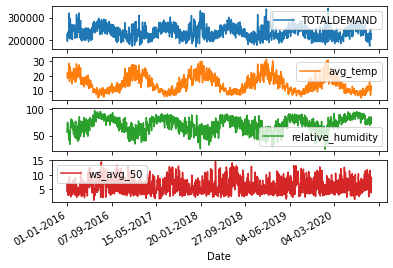

In [9]:
ts19.set_index('Date')[['TOTALDEMAND','avg_temp','relative_humidity','ws_avg_50']].plot(subplots=True)

In [ ]:
#### New

#test19.set_index('Date')[['total_demand','avg_temp','relative_humidity','ws_avg_50']].plot(subplots=True)

In [ ]:
# #### New

# test19.set_index(['Date'], inplace=True)
# test19.head()

In [10]:

ts19.set_index(['Date'], inplace=True)
ts19.head()

,TOTALDEMAND,relative_humidity,avg_temp,ws_avg_50
Date,,,,
01-01-2016,226550.31,56.49,21.855,4.305
02-01-2016,199245.28,66.32,20.415,7.175
03-01-2016,195312.89,71.23,18.875,6.685
04-01-2016,221865.01,75.53,18.490,5.835
05-01-2016,235747.16,68.87,19.215,2.985


In [11]:
ts19.describe()

,TOTALDEMAND,relative_humidity,avg_temp,ws_avg_50
count,1711.000000,1711.000000,1711.000000,1711.000000
mean,238292.377832,71.025985,14.437314,6.174305
std,27303.815962,13.524438,5.282906,2.503401
min,170188.750000,24.040000,4.940000,1.220000
25%,218645.815000,61.950000,9.885000,4.122500
50%,236614.310000,72.500000,13.410000,5.820000
75%,258331.630000,81.750000,18.187500,7.772500
max,341307.680000,98.240000,31.085000,14.540000


In [12]:
#Normalising the dataset

scaler = MinMaxScaler()
data_training = scaler.fit_transform(ts19)

In [ ]:
##### New

# #Normalising the dataset

# scaler = MinMaxScaler()
# data_testing = scaler.fit_transform(test19)

In [13]:
data_training

array([[0.32937069, 0.43733154, 0.64696883, 0.23160661],
       [0.16980313, 0.56981132, 0.59189138, 0.44707207],
       [0.14682268, 0.63598383, 0.5329891 , 0.41028529],
       ...,
       [0.3454529 , 0.70619946, 0.15720023, 0.19481982],
       [0.31536061, 0.67008086, 0.2314018 , 0.35247748],
       [0.33340362, 0.8245283 , 0.30981067, 0.5762012 ]])

In [ ]:
##### New

# data_testing

In [14]:
features = data_training
target = data_training[:,0]

In [ ]:
#### New

# features_test = data_testing
# target_test = data_testing[:,0]

In [15]:
TimeseriesGenerator(features, target, length=30, sampling_rate=1, batch_size=1)[0]

(array([[[0.32937069, 0.43733154, 0.64696883, 0.23160661],
         [0.16980313, 0.56981132, 0.59189138, 0.44707207],
         [0.14682268, 0.63598383, 0.5329891 , 0.41028529],
         [0.30199032, 0.69393531, 0.51826353, 0.34647147],
         [0.38311606, 0.6041779 , 0.5459935 , 0.13250751],
         [0.35028141, 0.64663073, 0.56855995, 0.46884384],
         [0.31905669, 0.52991914, 0.51099637, 0.44744745],
         [0.31305905, 0.50983827, 0.51176133, 0.34647147],
         [0.23829415, 0.48382749, 0.52935552, 0.2042042 ],
         [0.32672914, 0.29986523, 0.67814114, 0.1295045 ],
         [0.65496798, 0.2925876 , 0.8141136 , 0.22372372],
         [0.58335726, 0.45525606, 0.65595716, 0.23385886],
         [0.87560973, 0.22749326, 0.89596481, 0.47222222],
         [0.41260146, 0.47695418, 0.52151463, 0.61036036],
         [0.32901579, 0.39487871, 0.42685026, 0.50487988],
         [0.20981659, 0.36698113, 0.48288392, 0.20795796],
         [0.33897705, 0.22412399, 0.6746988 , 0.26351351

In [ ]:
##### New

#TimeseriesGenerator(features_test, target_test, length=30, sampling_rate=1, batch_size=1)[0]

In [16]:
features.shape

(1711, 4)

In [17]:
target.shape

(1711,)

In [ ]:
########## x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.0, shuffle=False)

In [18]:
x_train = features[:1361]
y_train = target[:1361]
x_test = features[1361:]
y_test = features[1361:]

In [ ]:
##### New

# x_train = features
# x_test = features_test
# y_train = target
# y_test = target_test

In [19]:
x_train.shape

(1361, 4)

In [20]:
x_test.shape

(350, 4)

In [21]:
x_test

array([[0.42974217, 0.7361186 , 0.18512144, 0.3506006 ],
       [0.47561021, 0.72991914, 0.18569516, 0.30405405],
       [0.45826087, 0.72425876, 0.23388793, 0.16103604],
       ...,
       [0.3454529 , 0.70619946, 0.15720023, 0.19481982],
       [0.31536061, 0.67008086, 0.2314018 , 0.35247748],
       [0.33340362, 0.8245283 , 0.30981067, 0.5762012 ]])

In [22]:
y_train.shape

(1361,)

In [23]:
y_test.shape

(350, 4)

In [24]:
win_length=30
batch_size=32
num_features = 4
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [25]:
train_generator[0]

(array([[[0.32937069, 0.43733154, 0.64696883, 0.23160661],
         [0.16980313, 0.56981132, 0.59189138, 0.44707207],
         [0.14682268, 0.63598383, 0.5329891 , 0.41028529],
         ...,
         [0.573583  , 0.57574124, 0.66112067, 0.3033033 ],
         [0.45022295, 0.75687332, 0.36335819, 0.13588589],
         [0.26279933, 0.58490566, 0.46739338, 0.25675676]],
 
        [[0.16980313, 0.56981132, 0.59189138, 0.44707207],
         [0.14682268, 0.63598383, 0.5329891 , 0.41028529],
         [0.30199032, 0.69393531, 0.51826353, 0.34647147],
         ...,
         [0.45022295, 0.75687332, 0.36335819, 0.13588589],
         [0.26279933, 0.58490566, 0.46739338, 0.25675676],
         [0.18916989, 0.69743935, 0.43736852, 0.28415916]],
 
        [[0.14682268, 0.63598383, 0.5329891 , 0.41028529],
         [0.30199032, 0.69393531, 0.51826353, 0.34647147],
         [0.38311606, 0.6041779 , 0.5459935 , 0.13250751],
         ...,
         [0.26279933, 0.58490566, 0.46739338, 0.25675676],
        

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length,num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           68096     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [28]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                   patience=2,
#                                                   mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False)#])#, callbacks=[early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
42/42 [==============================] - 5s 117ms/step - loss: 0.0373 - mean_absolute_error: 0.1520 - val_loss: 0.0555 - val_mean_absolute_error: 0.1955
Epoch 2/50
42/42 [==============================] - 4s 86ms/step - loss: 0.0256 - mean_absolute_error: 0.1243 - val_loss: 0.0546 - val_mean_absolute_error: 0.1960
Epoch 3/50
42/42 [==============================] - 4s 88ms/step - loss: 0.0251 - mean_absolute_error: 0.1227 - val_loss: 0.0548 - val_mean_absolute_error: 0.1955
Epoch 4/50
42/42 [==============================] - 4s 87ms/step - loss: 0.0256 - mean_absolute_error: 0.1248 - val_loss: 0.0561 - val_mean_absolute_error: 0.1952
Epoch 5/50
42/42 [==============================] - 4s 87ms/step - loss: 0.0251 - mean_absolute_error: 0.1239 - val_loss: 0.0576 - val_mean_absolute_error: 0.1964
Epoch 6/50
42/42 [==============================] - 4s 88ms/step - loss: 0.0258 - mean_absolute_error: 0.126

In [29]:
model.evaluate_generator(test_generator, verbose=0)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.06192890554666519, 0.20255276560783386]

In [30]:
predictions = model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [31]:
predictions.shape[0]

320

In [32]:
predictions

array([[0.35003167],
       [0.35519913],
       [0.33212513],
       [0.2802279 ],
       [0.24483703],
       [0.26030743],
       [0.30553788],
       [0.32423425],
       [0.34043893],
       [0.31811568],
       [0.3026468 ],
       [0.2621163 ],
       [0.24398263],
       [0.2541129 ],
       [0.24550056],
       [0.22427228],
       [0.22086357],
       [0.23777848],
       [0.25150448],
       [0.266541  ],
       [0.26572332],
       [0.26378238],
       [0.28573328],
       [0.302507  ],
       [0.31218258],
       [0.3094394 ],
       [0.310326  ],
       [0.32275885],
       [0.32910421],
       [0.32995808],
       [0.31149632],
       [0.291072  ],
       [0.27135885],
       [0.27962592],
       [0.3098718 ],
       [0.25962514],
       [0.26222432],
       [0.27837396],
       [0.285006  ],
       [0.24331039],
       [0.20945764],
       [0.20926607],
       [0.21716015],
       [0.23835906],
       [0.25377026],
       [0.25950894],
       [0.25965774],
       [0.273

In [34]:
y_test

array([[0.42974217, 0.7361186 , 0.18512144, 0.3506006 ],
       [0.47561021, 0.72991914, 0.18569516, 0.30405405],
       [0.45826087, 0.72425876, 0.23388793, 0.16103604],
       ...,
       [0.3454529 , 0.70619946, 0.15720023, 0.19481982],
       [0.31536061, 0.67008086, 0.2314018 , 0.35247748],
       [0.33340362, 0.8245283 , 0.30981067, 0.5762012 ]])

In [35]:
x_test[:,1:][win_length:]

array([[0.24797844, 0.54580226, 0.13325826],
       [0.13638814, 0.65155862, 0.53303303],
       [0.30795148, 0.44846051, 0.72785285],
       [0.58598383, 0.22241346, 0.70683183],
       [0.65188679, 0.26678141, 0.3734985 ],
       [0.41522911, 0.38248231, 0.09421922],
       [0.16913747, 0.53012048, 0.27252252],
       [0.24892183, 0.60585198, 0.25075075],
       [0.17196765, 0.70414993, 0.61786787],
       [0.24326146, 0.72231784, 0.71734234],
       [0.71091644, 0.51424747, 0.3765015 ],
       [0.60849057, 0.4540065 , 0.31043544],
       [0.71752022, 0.24268503, 0.27552553],
       [0.45390836, 0.30828074, 0.31493994],
       [0.4171159 , 0.40084146, 0.71734234],
       [0.61037736, 0.32243259, 0.77402402],
       [0.72318059, 0.15796519, 0.55142643],
       [0.67156334, 0.20462804, 0.6524024 ],
       [0.67978437, 0.3438516 , 0.30555556],
       [0.25660377, 0.46509849, 0.58821321],
       [0.42277628, 0.32071142, 0.73460961],
       [0.61644205, 0.26142666, 0.53190691],
       [0.

In [36]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [37]:
df_pred

,0,0,1,2
0,0.350032,0.247978,0.545802,0.133258
1,0.355199,0.136388,0.651559,0.533033
2,0.332125,0.307951,0.448461,0.727853
3,0.280228,0.585984,0.222413,0.706832
4,0.244837,0.651887,0.266781,0.373498
...,...,...,...,...
315,0.379528,0.746361,0.152037,0.604730
316,0.377226,0.662264,0.156053,0.309309
317,0.377087,0.706199,0.157200,0.194820
318,0.392625,0.670081,0.231402,0.352477


In [38]:
rev_trans = scaler.inverse_transform(df_pred)

In [39]:
rev_trans

array([[2.30085796e+05, 4.24400000e+01, 1.92100000e+01, 2.99500000e+00],
       [2.30970045e+05, 3.41600000e+01, 2.19750000e+01, 8.32000000e+00],
       [2.27021646e+05, 4.68900000e+01, 1.66650000e+01, 1.09150000e+01],
       ...,
       [2.34715402e+05, 7.64400000e+01, 9.05000000e+00, 3.81500000e+00],
       [2.37374361e+05, 7.37600000e+01, 1.09900000e+01, 5.91500000e+00],
       [2.37615737e+05, 8.52200000e+01, 1.30400000e+01, 8.89500000e+00]])

In [40]:
df_final=ts19[predictions.shape[0]*-1:]

In [ ]:
##### New 

#df_final_new=ts19[predictions.shape[0]*-1:]

In [41]:
df_final.count()

TOTALDEMAND          320
relative_humidity    320
avg_temp             320
ws_avg_50            320
dtype: int64

In [42]:
##### New

#df_final_new.count()

In [43]:
df_final['Energy_pred'] = rev_trans[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#### New

#df_final_new['Energy_pred'] = rev_trans[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
df_final.columns

Index(['TOTALDEMAND', 'relative_humidity', 'avg_temp', 'ws_avg_50',
       'Energy_pred'],
      dtype='object')

In [45]:
#df_final_new.columns

In [49]:
df_final

,TOTALDEMAND,relative_humidity,avg_temp,ws_avg_50,Energy_pred
Date,,,,,
23-10-2019,228563.23,42.44,19.210,2.995,230085.795505
24-10-2019,230885.31,34.16,21.975,8.320,230970.044787
25-10-2019,218261.54,46.89,16.665,10.915,227021.646412
26-10-2019,193396.57,67.52,10.755,10.635,218141.048327
27-10-2019,205661.11,72.41,11.915,6.195,212085.000729
...,...,...,...,...,...
26-09-2020,213389.93,79.42,8.915,9.275,235133.091282
27-09-2020,203406.98,73.18,9.020,5.340,234739.228045
28-09-2020,229302.28,76.44,9.050,3.815,234715.402053


In [47]:
df_test = df_final.reset_index()

In [ ]:
df_test = df_test[df_test.Date.between('2020-04-01', '2020-04-05')]

In [50]:
df_final.to_csv('Test.csv')

In [51]:
x = pd.read_csv("Test.csv")

In [52]:
x.head()

,Date,TOTALDEMAND,relative_humidity,avg_temp,ws_avg_50,Energy_pred
0,23-10-2019,228563.23,42.44,19.210,2.995,230085.795505
1,24-10-2019,230885.31,34.16,21.975,8.320,230970.044787
2,25-10-2019,218261.54,46.89,16.665,10.915,227021.646412
3,26-10-2019,193396.57,67.52,10.755,10.635,218141.048327
4,27-10-2019,205661.11,72.41,11.915,6.195,212085.000729


In [ ]:
#df_final_new

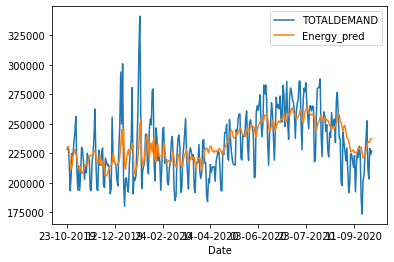

In [48]:
df_final[['TOTALDEMAND','Energy_pred']].plot()

In [58]:
t = pd.read_csv("2020_pred.csv")

In [59]:
t.set_index(['Date'], inplace=True)
t

,TOTALDEMAND,relative_humidity,avg_temp,ws_avg_50,Energy_pred
Date,,,,,
25/1/20,204891.76,59.84,20.180,3.635,206976.7605
26/1/20,202466.41,70.29,20.365,3.525,209054.3263
27/1/20,206268.92,66.62,19.210,4.290,211990.2348
28/1/20,232381.11,62.27,20.035,3.905,214022.0789
29/1/20,259625.83,55.53,21.695,3.220,221246.2605
...,...,...,...,...,...
26/9/20,213389.93,79.42,8.915,9.275,235133.0913
27/9/20,203406.98,73.18,9.020,5.340,234739.2280
28/9/20,229302.28,76.44,9.050,3.815,234715.4021


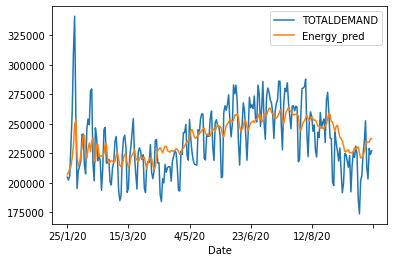

In [60]:
t[['TOTALDEMAND','Energy_pred']].plot()

**##### ANOTHER MODEL #####**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [ ]:
#Reading the dataset

data = pd.read_csv('u_fulldata_vic.csv',
                  parse_dates = True,
                  low_memory = False)

In [ ]:
#printing top rows

data.head()

,Month,Day,TOTALDEMAND,YEAR,Date,relative_humidity,dew_temp,max_temp,min_temp,temp2m,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,avg_temp,ws_avg_50,ws_avg_10,Unnamed: 19
0,1,1,226550.31,2016,01-01-2016,56.49,12.69,27.74,15.97,21.87,1.63,1.09,6.98,5.98,4.48,3.60,21.855,4.305,3.535,NaN
1,1,2,199245.28,2016,02-01-2016,66.32,12.94,26.07,14.76,19.40,4.69,4.19,9.66,8.12,7.04,5.80,20.415,7.175,6.155,NaN
2,1,3,195312.89,2016,03-01-2016,71.23,13.13,22.40,15.35,18.41,5.58,3.55,7.79,6.27,6.92,5.35,18.875,6.685,4.910,NaN
3,1,4,221865.01,2016,04-01-2016,75.53,13.78,21.67,15.31,18.16,3.91,3.01,7.76,5.58,5.39,4.07,18.490,5.835,4.295,NaN
4,1,5,235747.16,2016,05-01-2016,68.87,13.47,24.57,13.86,19.37,0.63,0.71,5.34,3.24,3.29,2.33,19.215,2.985,1.975,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1461 non-null   int64  
 1   Day                1461 non-null   int64  
 2   TOTALDEMAND        1461 non-null   float64
 3   YEAR               1461 non-null   int64  
 4   Date               1461 non-null   object 
 5   relative_humidity  1461 non-null   float64
 6   dew_temp           1461 non-null   float64
 7   max_temp           1461 non-null   float64
 8   min_temp           1461 non-null   float64
 9   temp2m             1461 non-null   float64
 10  WS50M_MIN          1461 non-null   float64
 11  WS10M_MIN          1461 non-null   float64
 12  WS50M_MAX          1461 non-null   float64
 13  WS10M_MAX          1461 non-null   float64
 14  WS50M              1461 non-null   float64
 15  WS10M              1461 non-null   float64
 16  avg_temp           1461 

In [ ]:
data = data[['TOTALDEMAND',	'YEAR',	'Date',	'relative_humidity',	'dew_temp', 'avg_temp',	'ws_avg_50']]

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.set_index(['Date'], inplace=True)
data.head()

,TOTALDEMAND,YEAR,relative_humidity,dew_temp,avg_temp,ws_avg_50
Date,,,,,,
2016-01-01,226550.31,2016,56.49,12.69,21.855,4.305
2016-02-01,199245.28,2016,66.32,12.94,20.415,7.175
2016-03-01,195312.89,2016,71.23,13.13,18.875,6.685
2016-04-01,221865.01,2016,75.53,13.78,18.490,5.835
2016-05-01,235747.16,2016,68.87,13.47,19.215,2.985


In [ ]:
data = data.drop(['YEAR'],axis=1)

In [ ]:
data.head()

,TOTALDEMAND,relative_humidity,dew_temp,avg_temp,ws_avg_50
Date,,,,,
2016-01-01,226550.31,56.49,12.69,21.855,4.305
2016-02-01,199245.28,66.32,12.94,20.415,7.175
2016-03-01,195312.89,71.23,13.13,18.875,6.685
2016-04-01,221865.01,75.53,13.78,18.490,5.835
2016-05-01,235747.16,68.87,13.47,19.215,2.985


In [ ]:
data = data.astype('float')

In [ ]:
#information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2016-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TOTALDEMAND        1461 non-null   float64
 1   relative_humidity  1461 non-null   float64
 2   dew_temp           1461 non-null   float64
 3   avg_temp           1461 non-null   float64
 4   ws_avg_50          1461 non-null   float64
dtypes: float64(5)
memory usage: 68.5 KB


In [ ]:
#checking the null values

np.isnan(data).sum()

TOTALDEMAND          0
relative_humidity    0
dew_temp             0
avg_temp             0
ws_avg_50            0
dtype: int64

In [ ]:
data.shape

(1461, 5)

In [ ]:
### Year wise histogram plot of feature Global_active_power

# years = [2016, 2017, 2018, 2019]

# fig, ax = plt.subplots(figsize=(18,18))

# for i in range(len(years)):
#     plt.subplot(len(years), 1, i+1)
#     year = years[i]
#     active_power_data = data[str(year)]
#     active_power_data['Global_active_power'].hist(bins = 200)
#     plt.title(str(year), y = 0, loc = 'left')
# plt.show()
# fig.tight_layout()

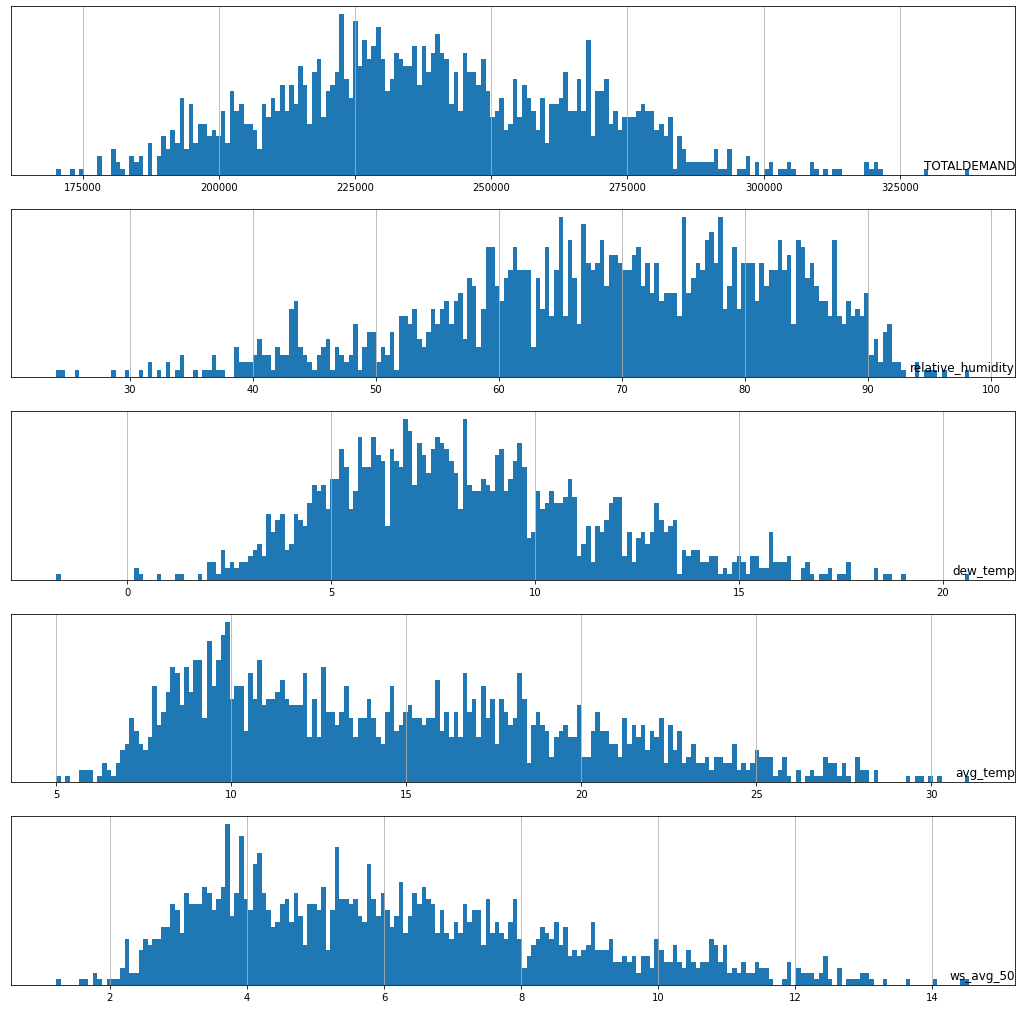

In [ ]:
### Histogram plot for All Features


fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

In [ ]:
# months = [i for i in range(1,13)]

# fig, ax = plt.subplots(figsize=(18,18))

# for i in range(len(months)):
#     ax = plt.subplot(len(months), 1, i+1)
#     month = '2016-' + str(months[i])
#     active_power_data = dataset[month]
#     active_power_data['Global_active_power'].hist(bins = 100)
#     ax.set_xlim(0,5)
#     plt.title(month, y = 0, loc = 'right')
# plt.show()
# fig.tight_layout()

In [ ]:
data_train = data.loc[:'2018-12-31', :]['TOTALDEMAND']
data_train.head()

Date
2016-01-01    226550.31
2016-02-01    199245.28
2016-03-01    195312.89
2016-04-01    221865.01
2016-05-01    235747.16
Name: TOTALDEMAND, dtype: float64

In [ ]:
data_test = data.loc['2019-01-01':, :]['TOTALDEMAND']
data_test.head()

Date
2019-01-01    193379.92
2019-02-01    212941.35
2019-03-01    237579.21
2019-04-01    266576.92
2019-05-01    194525.58
Name: TOTALDEMAND, dtype: float64

In [ ]:
data_train.shape

(1096,)

In [ ]:
data_test.shape

(365,)

In [ ]:
#converting the data into numpy array

data_train = np.array(data_train)

In [ ]:
#we are splitting the data weekly wise(7days)

X_train, y_train = [], []

for i in range(30, len(data_train)-30):
    X_train.append(data_train[i-30:i])
    y_train.append(data_train[i:i+30])

In [ ]:
#converting list to numpy array

X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train.shape, y_train.shape

((1036, 30), (1036, 30))

In [ ]:
#printing the ytrain value

pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,202559.30,239239.55,267978.31,245188.95,239839.21,252661.10,247474.02,248873.62,258654.45,262542.53,264530.01,262007.58,267691.04,241679.99,208729.47,241726.65,234124.07,238963.58,251928.37,245983.32,211823.42,215768.71,261054.65,313849.66,304838.83,276129.71,245151.87,221091.68,211563.97,250800.16
1,239239.55,267978.31,245188.95,239839.21,252661.10,247474.02,248873.62,258654.45,262542.53,264530.01,262007.58,267691.04,241679.99,208729.47,241726.65,234124.07,238963.58,251928.37,245983.32,211823.42,215768.71,261054.65,313849.66,304838.83,276129.71,245151.87,221091.68,211563.97,250800.16,279446.68
2,267978.31,245188.95,239839.21,252661.10,247474.02,248873.62,258654.45,262542.53,264530.01,262007.58,267691.04,241679.99,208729.47,241726.65,234124.07,238963.58,251928.37,245983.32,211823.42,215768.71,261054.65,313849.66,304838.83,276129.71,245151.87,221091.68,211563.97,250800.16,279446.68,290365.96
3,245188.95,239839.21,252661.10,247474.02,248873.62,258654.45,262542.53,264530.01,262007.58,267691.04,241679.99,208729.47,241726.65,234124.07,238963.58,251928.37,245983.32,211823.42,215768.71,261054.65,313849.66,304838.83,276129.71,245151.87,221091.68,211563.97,250800.16,279446.68,290365.96,272452.24
4,239839.21,252661.10,247474.02,248873.62,258654.45,262542.53,264530.01,262007.58,267691.04,241679.99,208729.47,241726.65,234124.07,238963.58,251928.37,245983.32,211823.42,215768.71,261054.65,313849.66,304838.83,276129.71,245151.87,221091.68,211563.97,250800.16,279446.68,290365.96,272452.24,298753.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,219412.84,213369.65,225173.48,220063.64,196870.65,177806.13,215332.61,223436.15,228450.24,270904.52,313296.81,242474.94,204322.23,221607.53,228827.57,259430.93,229972.66,220050.93,205154.29,198221.55,225608.80,226970.21,239814.49,223761.05,204151.85,185451.48,189876.79,224717.63,196383.31,200034.39
1032,213369.65,225173.48,220063.64,196870.65,177806.13,215332.61,223436.15,228450.24,270904.52,313296.81,242474.94,204322.23,221607.53,228827.57,259430.93,229972.66,220050.93,205154.29,198221.55,225608.80,226970.21,239814.49,223761.05,204151.85,185451.48,189876.79,224717.63,196383.31,200034.39,259498.28
1033,225173.48,220063.64,196870.65,177806.13,215332.61,223436.15,228450.24,270904.52,313296.81,242474.94,204322.23,221607.53,228827.57,259430.93,229972.66,220050.93,205154.29,198221.55,225608.80,226970.21,239814.49,223761.05,204151.85,185451.48,189876.79,224717.63,196383.31,200034.39,259498.28,267662.75
1034,220063.64,196870.65,177806.13,215332.61,223436.15,228450.24,270904.52,313296.81,242474.94,204322.23,221607.53,228827.57,259430.93,229972.66,220050.93,205154.29,198221.55,225608.80,226970.21,239814.49,223761.05,204151.85,185451.48,189876.79,224717.63,196383.31,200034.39,259498.28,267662.75,216580.22


In [ ]:
#Normalising the dataset between 0 and 1

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [ ]:
#Normalising the dataset

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.352364,0.181657,0.157073,0.323073,0.409862,0.374735,0.341330
1,0.181657,0.157073,0.323073,0.409862,0.374735,0.341330,0.334914
2,0.157073,0.323073,0.409862,0.374735,0.341330,0.334914,0.254930
3,0.323073,0.409862,0.374735,0.341330,0.334914,0.254930,0.349539
4,0.409862,0.374735,0.341330,0.334914,0.254930,0.349539,0.700692


In [ ]:
#converting to 3 dimension

X_train = X_train.reshape(1082, 7, 1)

In [ ]:
X_train.shape


(1082, 7, 1)

In [ ]:
#building sequential model using Keras

reg = Sequential()
reg.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
reg.add(Dense(7))

In [ ]:
#here we have considered loss as mean square error and optimizer as adam

reg.compile(loss='mse', optimizer='adam')

In [ ]:
#training the model

reg.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 19ms/step - loss: 0.0832
Epoch 2/100
34/34 [==============================] - 1s 19ms/step - loss: 0.0236
Epoch 3/100
34/34 [==============================] - 1s 19ms/step - loss: 0.0223
Epoch 4/100
34/34 [==============================] - 1s 19ms/step - loss: 0.0222
Epoch 5/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0220
Epoch 6/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0219
Epoch 7/100
34/34 [==============================] - 1s 19ms/step - loss: 0.0216
Epoch 8/100
34/34 [==============================] - 1s 17ms/step - loss: 0.0213
Epoch 9/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0208
Epoch 10/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0203
Epoch 11/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0204
Epoch 12/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0202
Epoch 13/100
34/34 [=====

In [ ]:
#testing dataset

data_test = np.array(data_test)

In [ ]:
#here we are splitting the data weekly wise(7days)

X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [ ]:
X_test.shape

(351, 7)

In [ ]:
#converting to 3 dimension

X_test = X_test.reshape(351,7,1)

In [ ]:
X_test.shape

(351, 7, 1)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([[0.3745624 , 0.3611636 , 0.37715012, ..., 0.24174231, 0.22721352,
        0.3288913 ],
       [0.37070298, 0.39411554, 0.34816134, ..., 0.21722972, 0.3456571 ,
        0.39009857],
       [0.35154685, 0.3637746 , 0.24854937, ..., 0.3574006 , 0.44291955,
        0.39021516],
       ...,
       [0.2153214 , 0.41793233, 0.5459913 , ..., 0.5703384 , 0.48120838,
        0.28899705],
       [0.31281775, 0.51425105, 0.5319567 , ..., 0.4775476 , 0.26944155,
        0.18287762],
       [0.42969683, 0.48464307, 0.525732  , ..., 0.30766287, 0.20849267,
        0.35214484]], dtype=float32)

In [ ]:
y_true = y_scaler.inverse_transform(y_test)

In [ ]:
y_true

array([[226892.2 , 210966.87, 216157.39, ..., 217257.92, 203706.48,
        294141.07],
       [210966.87, 216157.39, 239457.27, ..., 203706.48, 294141.07,
        304992.49],
       [216157.39, 239457.27, 217257.92, ..., 294141.07, 304992.49,
        273943.51],
       ...,
       [180291.23, 203636.05, 204337.86, ..., 192241.05, 214512.13,
        227043.37],
       [203636.05, 204337.86, 196625.49, ..., 214512.13, 227043.37,
        236587.05],
       [204337.86, 196625.49, 192241.05, ..., 227043.37, 236587.05,
        280820.25]])

In [ ]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [ ]:
evaluate_model(y_true, y_pred)

(237941.82711540966,
 [238010.18171506547,
  237933.4678228054,
  237888.2608554835,
  237884.02129429777,
  237849.35039723825,
  237901.89551058642,
  238125.49698635945])

In [ ]:
y_true

array([[226892.2 , 210966.87, 216157.39, ..., 217257.92, 203706.48,
        294141.07],
       [210966.87, 216157.39, 239457.27, ..., 203706.48, 294141.07,
        304992.49],
       [216157.39, 239457.27, 217257.92, ..., 294141.07, 304992.49,
        273943.51],
       ...,
       [180291.23, 203636.05, 204337.86, ..., 192241.05, 214512.13,
        227043.37],
       [203636.05, 204337.86, 196625.49, ..., 214512.13, 227043.37,
        236587.05],
       [204337.86, 196625.49, 192241.05, ..., 227043.37, 236587.05,
        280820.25]])

In [ ]:
y_pred

array([[0.3745624 , 0.3611636 , 0.37715012, ..., 0.24174231, 0.22721352,
        0.3288913 ],
       [0.37070298, 0.39411554, 0.34816134, ..., 0.21722972, 0.3456571 ,
        0.39009857],
       [0.35154685, 0.3637746 , 0.24854937, ..., 0.3574006 , 0.44291955,
        0.39021516],
       ...,
       [0.2153214 , 0.41793233, 0.5459913 , ..., 0.5703384 , 0.48120838,
        0.28899705],
       [0.31281775, 0.51425105, 0.5319567 , ..., 0.4775476 , 0.26944155,
        0.18287762],
       [0.42969683, 0.48464307, 0.525732  , ..., 0.30766287, 0.20849267,
        0.35214484]], dtype=float32)

In [ ]:
data = {'Original':y_true, 'Predicted':y_pred}
data = pd.DataFrame(data, index=[0])

Exception: ignored

In [ ]:
data

In [ ]:

np.std(y_true[0])

28335.9300978152

In [ ]:
data[['y_true','y_pred']].plot()

TypeError: ignored